In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Linear regression in diabetes dataset

Let's explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [62]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X = pd.DataFrame(diabetes.data)
y = pd.Series(diabetes.target)

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [63]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

10 features: age, sex, body mass index, average blood pressure, and six blood serum measurements

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

El data son todas las features con las que se calcularán los pesos para asignar a cada fila un target. Es decir, el target es el parámetro que queremos predecir.

1. How many records are there in the data?

442

#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [64]:
X.shape

(442, 10)

In [65]:
y.shape

(442,)

Es consistente, dado que target es unidimensional y data tiene 10 columnas.

## Building a regression model

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [66]:
from sklearn.linear_model import LinearRegression

#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [67]:
model = LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)

Perform a brief exploratory analysis to investigate the conditions necessary for linear regression. This analysis will help you understand the distribution of the target variable and its correlations with other features.

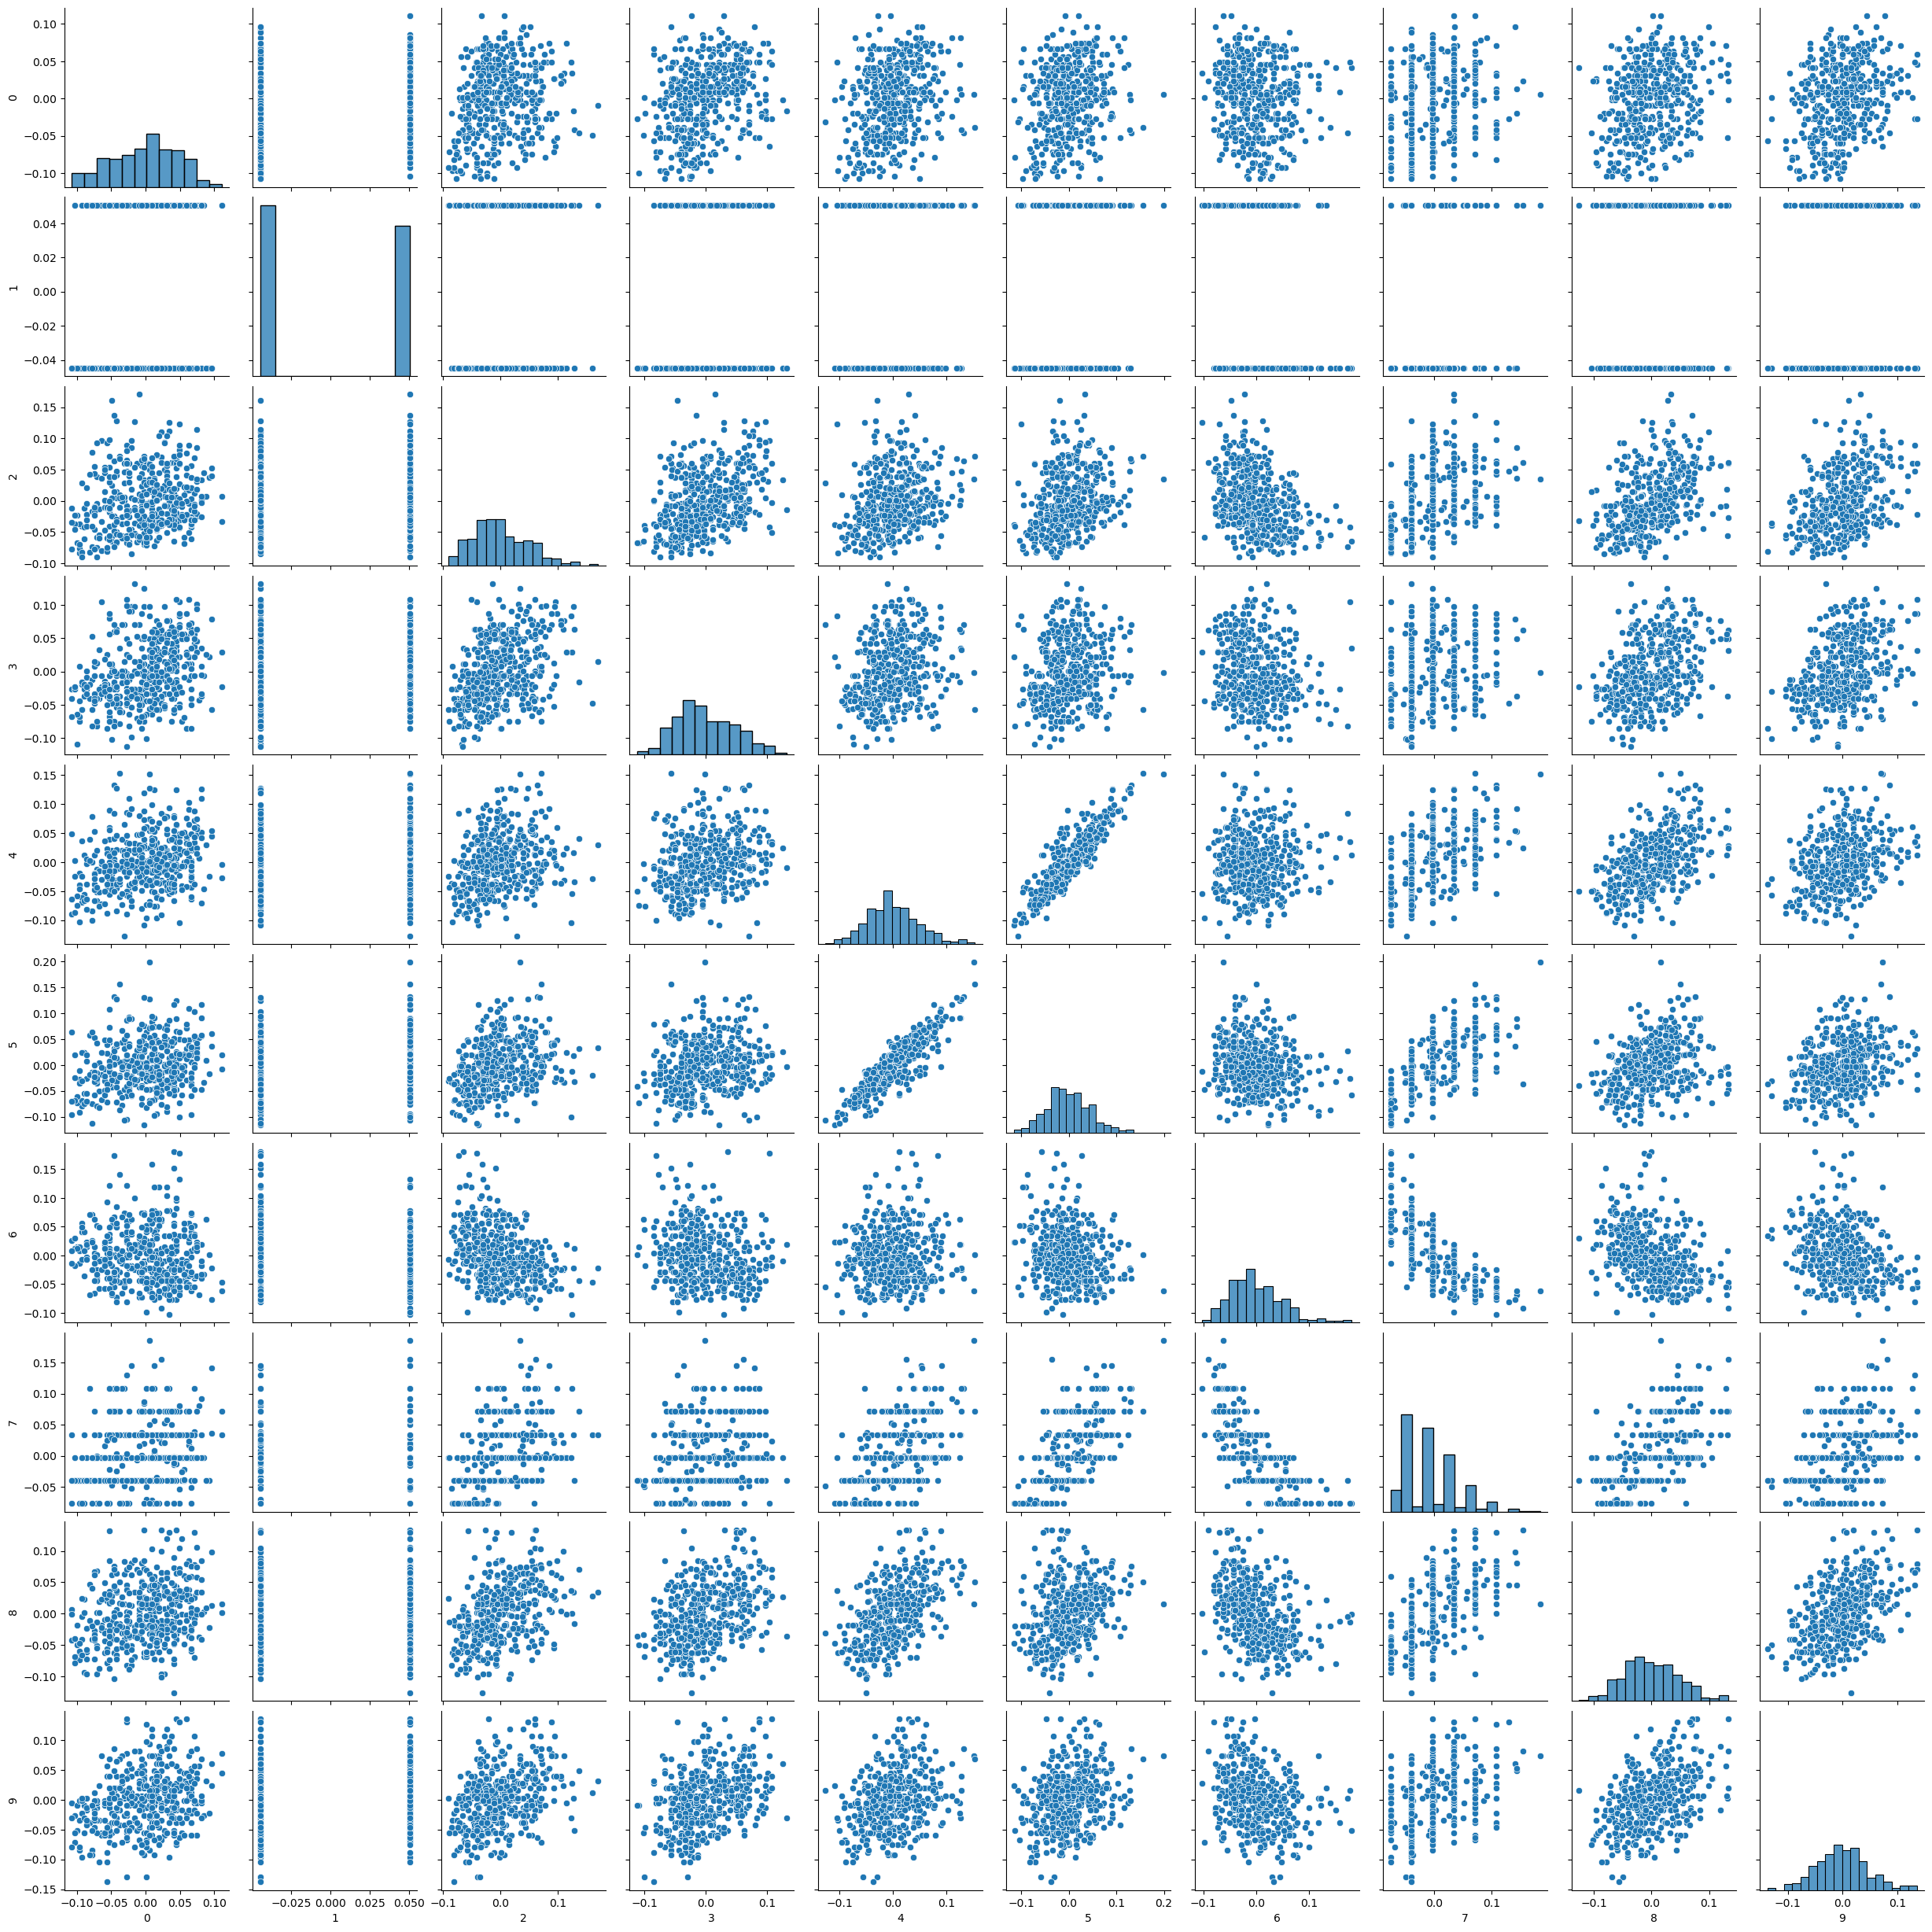

In [69]:
sns.pairplot(X)

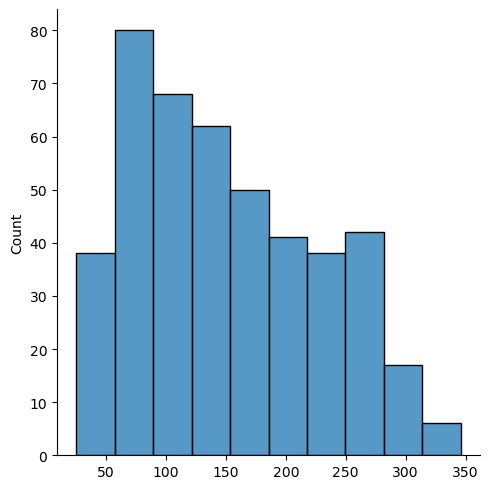

In [70]:
sns.displot(y);

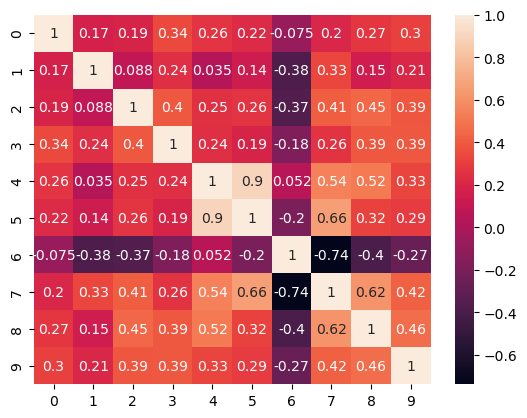

In [71]:
sns.heatmap(X.corr(numeric_only=True), annot=True);

Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [72]:
model.fit(X_train, y_train)

LinearRegression()

In [73]:
model.intercept_

152.76429169049118

In [74]:
pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

,Coefficient
0,0.306094
1,-237.635570
2,510.538048
3,327.729878
4,-814.111926
5,492.799595
6,102.841240
7,184.603496
8,743.509388
9,76.096646


#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

In [75]:
test_predictions = model.predict(X_test)

y = a + b*x1 + c*x2 + d*x3 + ....

#### Print your `diabetes_target_test` and compare with the prediction. 

In [76]:
pd.DataFrame(test_predictions, y_test)

,0
233.0,197.618985
91.0,155.440320
111.0,172.888751
152.0,111.532706
120.0,164.793973
67.0,131.067659
310.0,259.124412
94.0,100.478737
183.0,117.060054
66.0,124.302616


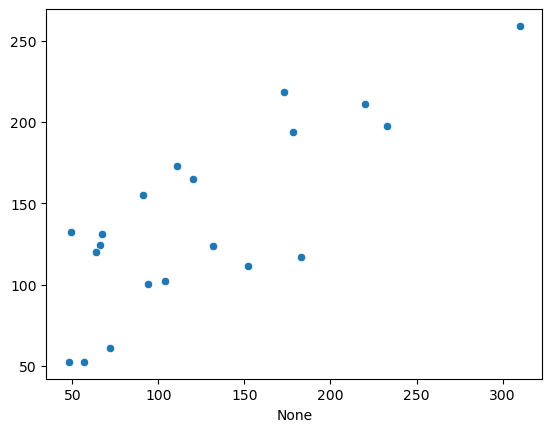

In [77]:
sns.scatterplot(x=y_test, y=test_predictions);

#### Is `diabetes_target_test` exactly the same as the model prediction? Use different error metrics

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

test_predictions = model.predict(X_test)

MAE = mean_absolute_error(y_test, test_predictions)
MAPE = mean_absolute_percentage_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)
		
print(f"MAE: {MAE}")
print(f"MAPE: {MAPE}")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")

print(f"\nMedia de la altura de los alumnos: {y.mean()}")

MAE: 36.60961865545879
MAPE: 0.39308761028730504
MSE: 2004.5186863342092
RMSE: 44.77185149548999

Media de la altura de los alumnos: 152.13348416289594


#### Iterate with a new model to assess if any improvements can be made compared to the previous one. Consider reducing the number of variables or using `StandardScaler` to enhance model performance.

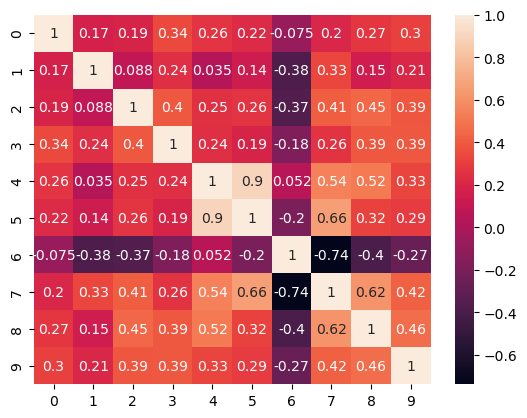

In [79]:
sns.heatmap(X.corr(numeric_only=True), annot=True);

In [80]:
X.drop(columns=[7], inplace=True)

Los datos ya están escalados de origen.

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)

In [83]:
model.fit(X_train, y_train)

LinearRegression()

In [84]:
test_predictions = model.predict(X_test)

In [85]:
pd.DataFrame(test_predictions, y_test)

,0
233.0,202.485344
91.0,149.252118
111.0,171.710297
152.0,111.717013
120.0,165.087741
67.0,132.091563
310.0,260.767563
94.0,101.669934
183.0,116.744319
66.0,122.776239


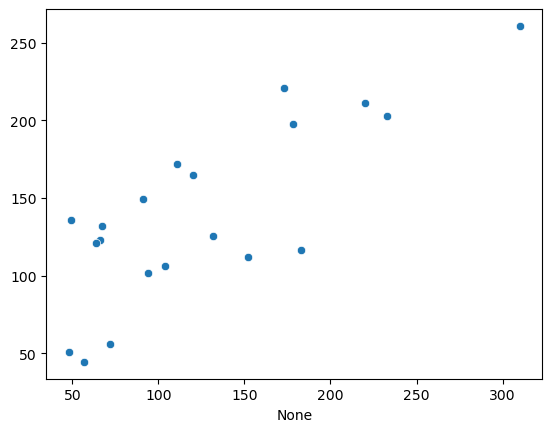

In [86]:
sns.scatterplot(x=y_test, y=test_predictions);

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

test_predictions = model.predict(X_test)

R2_
MAE = mean_absolute_error(y_test, test_predictions)
MAPE = mean_absolute_percentage_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)
		
print(f"MAE: {MAE}")
print(f"MAPE: {MAPE}")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")

print(f"\nMedia de la altura de los alumnos: {y.mean()}")

MAE: 37.00667215531887
MAPE: 0.4027807262064373
MSE: 2000.7383138438636
RMSE: 44.72961338804376

Media de la altura de los alumnos: 152.13348416289594
